# Import Packages

In [1318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1319]:
def QuickView(df):
    '''
    # Quick Data View Function to show columns, nulls,type and missing percentage in a dataframe",
    '''
    # Number of Null values for each column
    Nnull = pd.DataFrame(data=df.isnull().sum(), columns=['Nnull'])

    # Number of Unique Values for each column\
    Nunique = pd.DataFrame(data=df.nunique(), columns=['Nunique'])
    Nunique['Total Rows'] = df.shape[0]
    
    # Dtype for each column
    Dtype = pd.DataFrame(data=df.dtypes, columns=['Dtype'])
  
    # MissingRate for each column
    MissingRate = pd.DataFrame(data = df.isnull().sum()/df.shape[0], columns=['MissingRate'])
    
    #Sample
    SampleValue = pd.DataFrame(data= df.sample().sum(), columns = ['Sample'])
    
    # Descriptive stats for numerical columns
    Des = pd.DataFrame(data = df.describe().T)

    # Add more here, if you want to have quickview before you access to the further analysis\n",
    #Concat all columns you want
    
    DataQuickview = pd.concat([Nnull,Nunique,MissingRate, Dtype, SampleValue], axis = 1)
     # Object volumns don't have a description
    DataQuickview = DataQuickview.replace(np.nan,'na')
    return pd.DataFrame(DataQuickview)

# Import Data

This dataset contains various attributes related to individuals, primarily for classification tasks like predicting income or other socio-economic factors. Each attribute represents a characteristic of the individual, and can be either categorical or continuous. The target is income and is discrete.

| **Attribute**            | **Description**                                                                 | **Example**                                  |
|--------------------------|---------------------------------------------------------------------------------|----------------------------------------------|
| **Age**                  | The individual's age (continuous value).                                         | 25, 47, 62                                   |
| **Workclass**             | The individual's employment type, such as whether they work in private industry or government. | Private, Self-employed, Federal-gov          |
| **Demographic weight**    | A continuous value representing the socio-economic status of the individual's district. | 83311                               |
| **Education**             | The highest level of education attained by the individual.                       | Bachelors, Masters, HS-grad                  |
| **Education-num**         | The number of years of education the individual has completed (continuous).      | 10, 12, 16                                   |
| **Marital status**        | The individual's marital situation.                                               | Married-civ-spouse, Divorced, Widowed        |
| **Occupation**            | The type of job the individual holds.                                             | Tech-support, Sales, Executive-managerial    |
| **Relationship**          | The individual's relationship within their household.                             | Wife, Own-child, Husband                     |
| **Race**                  | The individual's race.                                                           | White, Black, Asian-Pac-Islander             |
| **Sex**                   | The individual's gender.                                                         | Male, Female                                 |
| **Capital gain** | Continuous values representing the individual’s income  from investments. | Capital gain: 5000      |
| **Capital loss** | Continuous values representing the individual’s losses from investments. | Capital loss: 0          |
| **Hours per week**        | The number of hours the individual works per week.                               | 40, 50, 60                                   |
| **Native country**        | The country of origin of the individual.                                          | United States, India, Mexico                 |


In [1320]:
df_raw = pd.read_csv('USCensusTraining.csv')
df_raw.columns = [colname.replace('-', '_') for colname in df_raw.columns]

#data preview, note the "?"
df_raw.sample(4, random_state=3)

,age,workclass,demogweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
11758,57,Self-emp-inc,161662,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,60,United-States,>50K.
9342,69,?,28197,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,60,United-States,>50K.
13245,28,Private,204074,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,48,United-States,<=50K.
10648,36,Private,188571,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K.


# Data Cleaning

In [1321]:
# for a in df_raw.columns:
#     print(df_raw[a].value_counts())
#     print('\n------------------------\n')

In [1322]:
# Using sample shows that `workclass`, `occupation` and `native_country` have "?" values
df_1 = df_raw.replace('?', None)
QuickView(df_1)


,Nnull,Nunique,Total Rows,MissingRate,Dtype,Sample
age,0,72,25000,0.00000,int64,23
workclass,1399,8,25000,0.05596,object,Private
demogweight,0,17824,25000,0.00000,int64,167424
education,0,16,25000,0.00000,object,Some-college
education_num,0,16,25000,0.00000,int64,10
marital_status,0,7,25000,0.00000,object,Never-married
occupation,1404,14,25000,0.05616,object,Other-service
relationship,0,6,25000,0.00000,object,Own-child
race,0,5,25000,0.00000,object,White
sex,0,2,25000,0.00000,object,Female


**Observations**
- Only 2 unique values for the target variable `income`, need to check distribution
- 16 Education levels?

**Problems**
- Missing Data Problem: ranges between 1.7% to 5.6% for cols `workclass`, `occupation` and `native_country`. We can choose to fix by:
    - Drop
    - Impute with mode since these are categorical
    - Build some other model to fill these values, using KNN might be helpful?

In [1323]:
#df_1.education.value_counts()
#preschool?

In [1324]:
# Using mode for the sake of time
workclass_mode = df_1['workclass'].mode()[0]
occupation_mode = df_1['occupation'].mode()[0]
native_country_mode = df_1['native_country'].mode()[0]

# Imputation
df_1['workclass'].fillna(workclass_mode, inplace=True)
df_1['occupation'].fillna(occupation_mode, inplace=True)
df_1['native_country'].fillna(native_country_mode, inplace=True)

/var/folders/8b/cv3m4j_s1y11xcc8l3vn77080000gn/T/ipykernel_99626/4080160134.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['workclass'].fillna(workclass_mode, inplace=True)
/var/folders/8b/cv3m4j_s1y11xcc8l3vn77080000gn/T/ipykernel_99626/4080160134.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [1325]:
df_1.head()

,age,workclass,demogweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.


In [1326]:
QuickView(df_1)
# Temp fixed!


,Nnull,Nunique,Total Rows,MissingRate,Dtype,Sample
age,0,72,25000,0.0,int64,46
workclass,0,8,25000,0.0,object,Private
demogweight,0,17824,25000,0.0,int64,271828
education,0,16,25000,0.0,object,HS-grad
education_num,0,16,25000,0.0,int64,9
marital_status,0,7,25000,0.0,object,Married-civ-spouse
occupation,0,14,25000,0.0,object,Machine-op-inspct
relationship,0,6,25000,0.0,object,Husband
race,0,5,25000,0.0,object,White
sex,0,2,25000,0.0,object,Male


### Handling target variable `income`

In [1327]:
df_1.income.value_counts(normalize=True) # hmm not quite an even split here.

income
<=50K.    0.76064
>50K.     0.23936
Name: proportion, dtype: float64

In [1328]:
# df_1[['education', 'education_num']].value_counts().reset_index().sort_values(by= 'education_num')
# # We see correlation here! We should omit these since we will one-hot-encode and each col will be 100% correlation with the dummy var

# 1a 

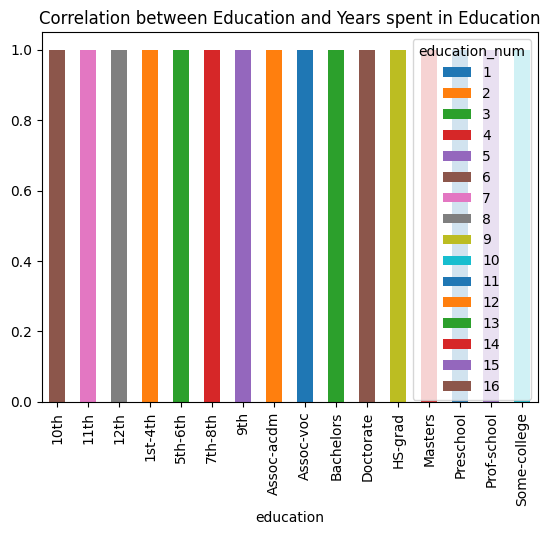

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11th,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st-4th,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5th-6th,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7th-8th,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9th,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Assoc-acdm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Assoc-voc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1329]:
# We have education and education number. Is there any correlation?
 
cross_table = pd.crosstab(df_1['education'], df_1['education_num'])
cross_table = cross_table.div(cross_table.sum(axis=1), axis=0)
 
 
cross_table.plot(kind = 'bar',
                 stacked = True)
plt.title('Correlation between Education and Years spent in Education')
plt.show()
display(cross_table)

In [1330]:
# Converting the target var into binary
df_1['income_over_50K'] = np.where(df_1.income == "<=50K.", 0, 1)
df_1[['income_over_50K', 'income']].sample(3)

,income_over_50K,income
3361,0,<=50K.
12441,0,<=50K.
3917,0,<=50K.


In [1331]:
#now that we know it works, we can drop it
#df_1.drop(columns = ['income'], inplace= True)

In [1332]:
df_1.drop(columns = ['education_num'], inplace= True)

In [1333]:
df_1.drop(columns = ['income'], inplace= True)

# Part 1a: Create a neural network

Neural nets require standardized inputs, ranging between 0 and 1 for the backpropegation to not be overwhelmed. Higher values would create cause the weight adjustment to favour any variable with a large magnitude
- Need to convert categorical variables to dummy variables
- Need to standardize the numericals



**Note that in the in-class example for ANN, Prof preprocessed the target variable too**

In [1334]:
df_1a = pd.get_dummies(df_1, drop_first=True)
df_1a.columns = [colname.replace('-', '_') for colname in df_1a.columns]
df_1a = df_1a.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x) # converts from bool (from dummy var) to int
df_1a.sample(2)

,age,demogweight,capital_gain,capital_loss,hours_per_week,income_over_50K,workclass_Local_gov,workclass_Never_worked,workclass_Private,workclass_Self_emp_inc,...,native_country_Portugal,native_country_Puerto_Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United_States,native_country_Vietnam,native_country_Yugoslavia
17249,32,44677,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
774,55,116442,0,0,38,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [1335]:
df_1a.shape
# We now have 98 cols, including the target variable `income_over_50K`

(25000, 97)

In [1336]:
#moving the target at the end of the dataframe
# This helps with receiving a numpy array later
col_order = [colname for colname in df_1a if colname != 'income_over_50K']
df_1a = df_1a[col_order + ['income_over_50K']]

new_col_order = df_1a.columns

### Standardizing

In [1337]:
from sklearn import preprocessing

In [1338]:
scaler = preprocessing.MinMaxScaler()
scaled_array = scaler.fit_transform(df_1a)


In [1339]:
#Just testing that it is okay - it is

df_scaled = pd.DataFrame(scaled_array)
# df_scaled[97].tail(20)
# df_1a.income_over_50K.tail(20)
df_scaled.columns = new_col_order

### Split into testing and validation

In [1340]:
from sklearn.model_selection import train_test_split

In [1341]:
df_predictors = df_scaled[col_order]
df_target = df_scaled['income_over_50K'] # the target var, the last col

In [1342]:
X_train, X_valid, y_train, y_valid = train_test_split(df_predictors, 
                                                      df_target, 
                                                      test_size=0.3, 
                                                      random_state=42)

In [1343]:
y_train.value_counts(normalize=True)

income_over_50K
0.0    0.762171
1.0    0.237829
Name: proportion, dtype: float64

In [1344]:
y_valid.value_counts(normalize=True)

income_over_50K
0.0    0.757067
1.0    0.242933
Name: proportion, dtype: float64

In [1345]:
#Convert the DataFrames back to numpy arrays that the Neural Nets can use
X_train_array = X_train.to_numpy()
X_valid_array = X_valid.to_numpy()
y_train_array = y_train.to_numpy()
y_valid_array = y_valid.to_numpy()

### Building Neural Net 

In [1346]:
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [1347]:
f'We have {X_train.shape[1]} predictors. Need to have at least that much input'


'We have 96 predictors. Need to have at least that much input'

In [1348]:
from keras.regularizers import l2
from keras.layers import Dense, Dropout

In [1349]:
import tensorflow as tf

def custom_binary_crossentropy(y_true, y_pred):
    return tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))

In [1350]:

def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(70, input_shape=(96,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(30, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=custom_binary_crossentropy, optimizer= optimizer, metrics=['accuracy'])
    return model

In [1351]:
import tensorflow as tf 
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
tf.random.set_seed(42)
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=8, verbose=1)

# Model Checkpoint
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)

# Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001, verbose=1)


NN_Model1 = create_model()
NN_Model1.fit(X_train_array, 
              y_train_array, 
              epochs = 75,
              callbacks=[early_stopping, model_checkpoint, reduce_lr],
              batch_size = 128)

# using 5 for ease of calculation

Epoch 1/75


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.6940 - loss: 0.5663 - learning_rate: 0.0010
Epoch 2/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8186 - loss: 0.3852 - learning_rate: 0.0010
Epoch 3/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8271 - loss: 0.3738 - learning_rate: 0.0010
Epoch 4/75
  1/137 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8125 - loss: 0.3960

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/callbacks/callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.8326 - loss: 0.3612 - learning_rate: 0.0010
Epoch 5/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step - accuracy: 0.8367 - loss: 0.3540 - learning_rate: 0.0010
Epoch 6/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.8385 - loss: 0.3503 - learning_rate: 0.0010
Epoch 7/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 538us/step - accuracy: 0.8402 - loss: 0.3481 - learning_rate: 0.0010
Epoch 8/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.8409 - loss: 0.3423 - learning_rate: 0.0010
Epoch 9/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8439 - loss: 0.3406 - learning_rate: 0.0010
Epoch 10/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8479 - loss: 0.3359 - learning_rate: 0.0010
Epoch 11/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8448 - loss: 0.3326 - learning_rate: 0.0010
Epoch 12/75
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.8474 - loss: 0.3302 - learning_rate: 0.0010


# 1b

In [1352]:
names = X_valid.columns.to_list()
names

['age',
 'demogweight',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass_Local_gov',
 'workclass_Never_worked',
 'workclass_Private',
 'workclass_Self_emp_inc',
 'workclass_Self_emp_not_inc',
 'workclass_State_gov',
 'workclass_Without_pay',
 'education_11th',
 'education_12th',
 'education_1st_4th',
 'education_5th_6th',
 'education_7th_8th',
 'education_9th',
 'education_Assoc_acdm',
 'education_Assoc_voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS_grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof_school',
 'education_Some_college',
 'marital_status_Married_AF_spouse',
 'marital_status_Married_civ_spouse',
 'marital_status_Married_spouse_absent',
 'marital_status_Never_married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Armed_Forces',
 'occupation_Craft_repair',
 'occupation_Exec_managerial',
 'occupation_Farming_fishing',
 'occupation_Handlers_cleaners',
 'occupation_Machine_op_inspct',
 'occupation_

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━

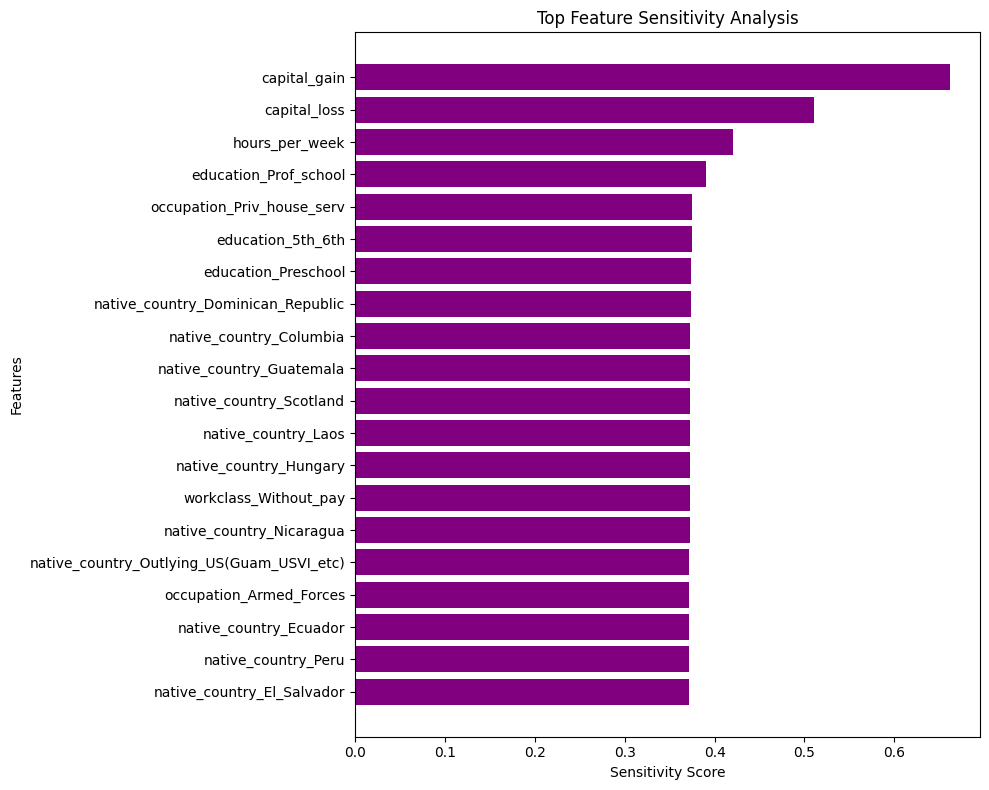

In [1353]:
import numpy as np
import matplotlib.pyplot as plt

# Sensitivity Analysis Function
def sensitivity_analysis(model, data, feature_names=None):
    # Check for feature name mismatch
    if not feature_names or len(feature_names) != data.shape[1]:
        print("Feature names mismatch detected. Generating default names.")
        feature_names = [f"Feature {i}" for i in range(data.shape[1])]

    # Calculate the mean of each feature across all samples
    x_mean = np.mean(data, axis=0)
    
    # Predict the output for the mean input
    output_mean = model.predict(np.array([x_mean]))
    
    # Initialize a list to store sensitivity scores for each feature
    sensitivity_scores = []
    
    # Iterate over each feature
    for i in range(data.shape[1]):
        x_min = np.copy(x_mean)
        x_max = np.copy(x_mean)
        x_min[i] = np.min(data[:, i])
        x_max[i] = np.max(data[:, i])
        
        # Predict the output for these modified inputs
        output_min = model.predict(np.array([x_min])).flatten()[0]
        output_max = model.predict(np.array([x_max])).flatten()[0]
        
        # Calculate the sensitivity as the absolute difference between the max and min outputs
        sensitivity = np.abs(output_max - output_min)
        
        # Get feature name
        feature_name = feature_names[i]
        
        # Append the feature name and its calculated sensitivity to the list
        sensitivity_scores.append((feature_name, sensitivity))
    
    # Sort features by their sensitivity score in descending order
    sensitivity_scores.sort(key=lambda x: x[1], reverse=True)
    
    return sensitivity_scores

# Visualization Function
def plot_sensitivity_scores(scores, save_file='sensitivity_plot.png', top_n=20):
    scores = scores[:top_n]
    features, sensitivities = zip(*scores)
    
    plt.figure(figsize=(10, 8))
    plt.barh(features, sensitivities, align='center', color="purple")
    plt.xlabel('Sensitivity Score')
    plt.ylabel('Features')
    plt.title('Top Feature Sensitivity Analysis')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    
    # Save plot to file
    plt.savefig(save_file)
    print(f"Plot saved as '{save_file}'")
        
feature_names = [names[i] for i in range(X_valid_array.shape[1])]

# Run sensitivity analysis with automatically generated feature names
sensitivity_scores = sensitivity_analysis(NN_Model1, X_valid_array, feature_names=feature_names)
plot_sensitivity_scores(sensitivity_scores)


# 1C

In [1354]:
predictions = NN_Model1.predict(X_valid)
pred_clsfcn = [round(x[0]) for x in predictions]
print(pred_clsfcn)

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [1355]:
_, accuracy = NN_Model1.evaluate(X_valid, y_valid) ################
print('Accuracy: %.2f' % (accuracy*100))

#can't get this to budge. Tried diff epochs, diff batch sizes, diff activation fn, diff metrics

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8533 - loss: 0.3462
Accuracy: 84.96


# 1D

In [1356]:
from dmba import classificationSummary
classificationSummary(y_valid_array, pred_clsfcn)

Confusion Matrix (Accuracy 0.8496)

       Prediction
Actual    0    1
     0 5296  382
     1  746 1076


# 1e

In [1357]:
occupation_dum = pd.get_dummies(df_1['occupation']).columns.tolist()
occupation_dum = [colname.replace('-', '_') for colname in occupation_dum]
occupation_dum = ['occupation_' + colname for colname in occupation_dum]
print(occupation_dum)
occupation_dum = occupation_dum[1:]


['occupation_Adm_clerical', 'occupation_Armed_Forces', 'occupation_Craft_repair', 'occupation_Exec_managerial', 'occupation_Farming_fishing', 'occupation_Handlers_cleaners', 'occupation_Machine_op_inspct', 'occupation_Other_service', 'occupation_Priv_house_serv', 'occupation_Prof_specialty', 'occupation_Protective_serv', 'occupation_Sales', 'occupation_Tech_support', 'occupation_Transport_moving']


In [1358]:
X_valid['pred'] = pred_clsfcn
# X_v
Over50k = X_valid[X_valid['pred']==1]

In [1359]:
print(occupation_dum)
Over50k_occupation = Over50k[occupation_dum]
Over50k_occupation['occupation_Adm_clerical'] = Over50k_occupation[occupation_dum].sum(axis=1) == 0
# print(Over50k_occupation)

['occupation_Armed_Forces', 'occupation_Craft_repair', 'occupation_Exec_managerial', 'occupation_Farming_fishing', 'occupation_Handlers_cleaners', 'occupation_Machine_op_inspct', 'occupation_Other_service', 'occupation_Priv_house_serv', 'occupation_Prof_specialty', 'occupation_Protective_serv', 'occupation_Sales', 'occupation_Tech_support', 'occupation_Transport_moving']


/var/folders/8b/cv3m4j_s1y11xcc8l3vn77080000gn/T/ipykernel_99626/1517064984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Over50k_occupation['occupation_Adm_clerical'] = Over50k_occupation[occupation_dum].sum(axis=1) == 0


In [1360]:
occupation_counts = Over50k_occupation.sum()
occupation_proportions = occupation_counts / len(Over50k)
sorted_occupation_proportions = occupation_proportions.sort_values(ascending=False)

# print("Occupation Counts:\n", occupation_counts)
print("Occupation Proportions:\n", sorted_occupation_proportions)

Occupation Proportions:
 occupation_Prof_specialty       0.316872
occupation_Exec_managerial      0.316187
occupation_Sales                0.150892
occupation_Adm_clerical         0.063786
occupation_Craft_repair         0.050069
occupation_Tech_support         0.035665
occupation_Transport_moving     0.027435
occupation_Protective_serv      0.024005
occupation_Machine_op_inspct    0.004801
occupation_Other_service        0.004801
occupation_Farming_fishing      0.003429
occupation_Handlers_cleaners    0.002058
occupation_Armed_Forces         0.000000
occupation_Priv_house_serv      0.000000
dtype: float64


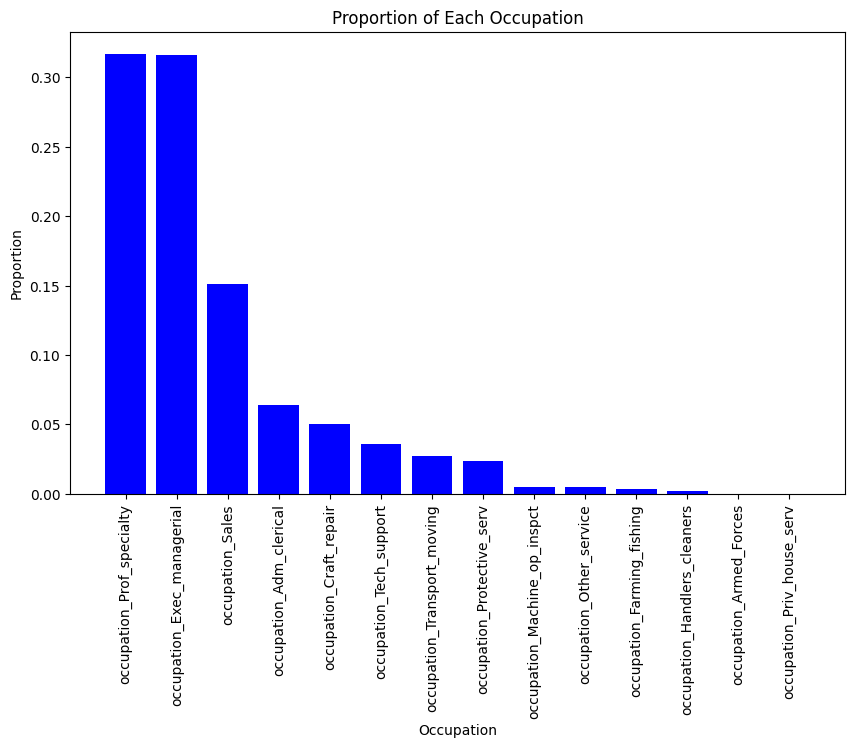

In [1361]:
import matplotlib.pyplot as plt

occupations = list(sorted_occupation_proportions.index) 
proportions = list(sorted_occupation_proportions.values) 

plt.figure(figsize=(10, 6))
plt.bar(occupations, proportions, color='blue') 
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.title('Proportion of Each Occupation')
plt.xticks(rotation=90) 
plt.show()



In [1362]:
Over50k_occupation

,occupation_Armed_Forces,occupation_Craft_repair,occupation_Exec_managerial,occupation_Farming_fishing,occupation_Handlers_cleaners,occupation_Machine_op_inspct,occupation_Other_service,occupation_Priv_house_serv,occupation_Prof_specialty,occupation_Protective_serv,occupation_Sales,occupation_Tech_support,occupation_Transport_moving,occupation_Adm_clerical
12909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
9567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
6492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False
8614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False
24427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
21523,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
5748,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
21156,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [1363]:
occupation_dum

['occupation_Armed_Forces',
 'occupation_Craft_repair',
 'occupation_Exec_managerial',
 'occupation_Farming_fishing',
 'occupation_Handlers_cleaners',
 'occupation_Machine_op_inspct',
 'occupation_Other_service',
 'occupation_Priv_house_serv',
 'occupation_Prof_specialty',
 'occupation_Protective_serv',
 'occupation_Sales',
 'occupation_Tech_support',
 'occupation_Transport_moving']

In [1364]:
edu_dum = pd.get_dummies(df_1['education']).columns.tolist()
edu_dum = [colname.replace('-', '_') for colname in edu_dum]
edu_dum = ['education_' + colname for colname in edu_dum]
print(edu_dum)
edu_dum = edu_dum[1:]

Over50k_edu = Over50k[edu_dum]
Over50k_edu['education_10th'] = Over50k_edu[edu_dum].sum(axis=1) == 0

['education_10th', 'education_11th', 'education_12th', 'education_1st_4th', 'education_5th_6th', 'education_7th_8th', 'education_9th', 'education_Assoc_acdm', 'education_Assoc_voc', 'education_Bachelors', 'education_Doctorate', 'education_HS_grad', 'education_Masters', 'education_Preschool', 'education_Prof_school', 'education_Some_college']


/var/folders/8b/cv3m4j_s1y11xcc8l3vn77080000gn/T/ipykernel_99626/2902238146.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Over50k_edu['education_10th'] = Over50k_edu[edu_dum].sum(axis=1) == 0


In [1365]:
edu_counts = Over50k_edu.sum()
edu_proportions = edu_counts / len(Over50k)
sorted_edu_proportions = edu_proportions.sort_values(ascending=False)

print("Education Proportions:\n", sorted_edu_proportions)

Education Proportions:
 education_Bachelors       0.351166
education_Masters         0.155693
education_Some_college    0.155693
education_HS_grad         0.127572
education_Prof_school     0.082305
education_Doctorate       0.048011
education_Assoc_acdm      0.034979
education_Assoc_voc       0.032236
education_10th            0.005487
education_11th            0.003429
education_12th            0.001372
education_5th_6th         0.001372
education_Preschool       0.000686
education_1st_4th         0.000000
education_7th_8th         0.000000
education_9th             0.000000
dtype: float64


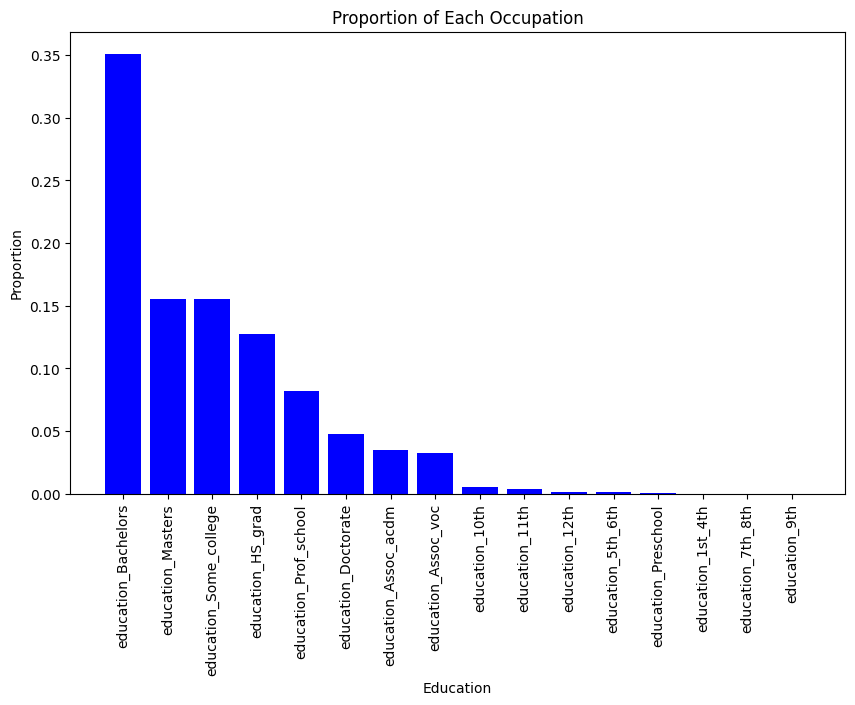

In [1366]:
import matplotlib.pyplot as plt

occupations = list(sorted_edu_proportions.index)  
proportions = list(sorted_edu_proportions.values) 

plt.figure(figsize=(10, 6))
plt.bar(occupations, proportions, color='blue')
plt.xlabel('Education')
plt.ylabel('Proportion')
plt.title('Proportion of Each Occupation')
plt.xticks(rotation=90) 
plt.show()


In [1367]:
import pandas as pd

age_data = df_1a.loc[X_valid.index]

age_data = age_data[['age', 'income_over_50K']]

age_data['pred'] = pred_clsfcn

age_data = age_data[age_data['pred'] == 1]

print(len(age_data))

1458


In [1368]:
age_proportions = age_data['age'].value_counts(normalize=True)
top_ages = age_proportions[:10]
print(top_ages)


age
41    0.042524
39    0.041838
50    0.041152
43    0.041152
42    0.039095
45    0.038409
44    0.037723
47    0.034979
36    0.034294
52    0.033608
Name: proportion, dtype: float64


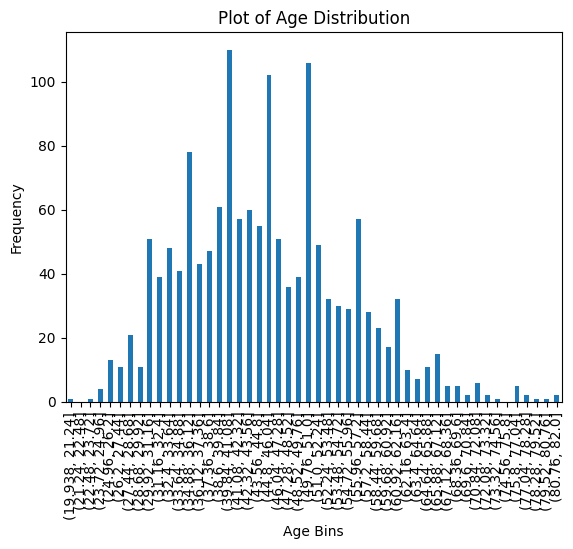

In [1369]:
cut_capital_gain = pd.cut(age_data['age'], bins=50)

age_bin_counts = cut_capital_gain.value_counts()

age_bin_counts = age_bin_counts.sort_index()

age_bin_counts.plot(kind='bar', stacked=True)
plt.title('Plot of Age Distribution')
plt.xlabel('Age Bins')
plt.ylabel('Frequency')
plt.show()

In [1370]:
df_1.native_country.value_counts(normalize=True)

native_country
United-States                 0.91464
Mexico                        0.01952
Philippines                   0.00604
Germany                       0.00408
Canada                        0.00396
Puerto-Rico                   0.00384
England                       0.00288
Cuba                          0.00288
El-Salvador                   0.00288
India                         0.00268
South                         0.00256
China                         0.00240
Jamaica                       0.00232
Italy                         0.00220
Dominican-Republic            0.00216
Vietnam                       0.00200
Guatemala                     0.00200
Poland                        0.00196
Japan                         0.00192
Columbia                      0.00180
Taiwan                        0.00168
Haiti                         0.00152
Iran                          0.00140
Portugal                      0.00112
Nicaragua                     0.00100
Peru                          0.000

In [1371]:

native_country_dum = pd.get_dummies(df_1['native_country']).columns.tolist()
native_country_dum = [colname.replace('-', '_') for colname in native_country_dum]
native_country_dum = ['native_country_' + colname for colname in native_country_dum]
print(native_country_dum)
native_country_dum = native_country_dum[1:]

Over50k_native_country = Over50k[native_country_dum]
Over50k_native_country['native_country_Cambodia'] = Over50k_native_country[native_country_dum].sum(axis=1) == 0

['native_country_Cambodia', 'native_country_Canada', 'native_country_China', 'native_country_Columbia', 'native_country_Cuba', 'native_country_Dominican_Republic', 'native_country_Ecuador', 'native_country_El_Salvador', 'native_country_England', 'native_country_France', 'native_country_Germany', 'native_country_Greece', 'native_country_Guatemala', 'native_country_Haiti', 'native_country_Holand_Netherlands', 'native_country_Honduras', 'native_country_Hong', 'native_country_Hungary', 'native_country_India', 'native_country_Iran', 'native_country_Ireland', 'native_country_Italy', 'native_country_Jamaica', 'native_country_Japan', 'native_country_Laos', 'native_country_Mexico', 'native_country_Nicaragua', 'native_country_Outlying_US(Guam_USVI_etc)', 'native_country_Peru', 'native_country_Philippines', 'native_country_Poland', 'native_country_Portugal', 'native_country_Puerto_Rico', 'native_country_Scotland', 'native_country_South', 'native_country_Taiwan', 'native_country_Thailand', 'native

/var/folders/8b/cv3m4j_s1y11xcc8l3vn77080000gn/T/ipykernel_99626/2905621428.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Over50k_native_country['native_country_Cambodia'] = Over50k_native_country[native_country_dum].sum(axis=1) == 0


In [1372]:
native_country_counts = Over50k_native_country.sum()
native_country_proportions = native_country_counts / len(Over50k)
sorted_native_country_proportions = native_country_proportions.sort_values(ascending=False)

print("Native Country Proportions:\n", native_country_proportions)

Native Country Proportions:
 native_country_Canada                        0.005487
native_country_China                         0.001372
native_country_Columbia                      0.000000
native_country_Cuba                          0.001372
native_country_Dominican_Republic            0.000000
native_country_Ecuador                       0.000000
native_country_El_Salvador                   0.001372
native_country_England                       0.004115
native_country_France                        0.001372
native_country_Germany                       0.006859
native_country_Greece                        0.000686
native_country_Guatemala                     0.000000
native_country_Haiti                         0.000686
native_country_Holand_Netherlands            0.000000
native_country_Honduras                      0.000686
native_country_Hong                          0.000686
native_country_Hungary                       0.000000
native_country_India                         0.005487

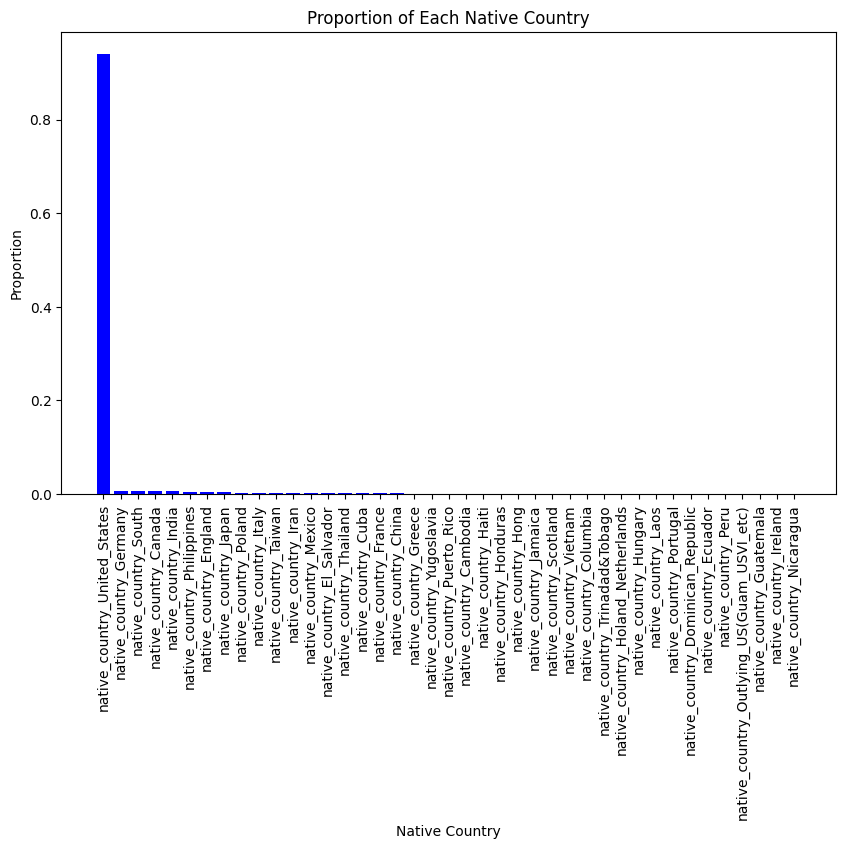

In [1373]:
import matplotlib.pyplot as plt

native_country = list(sorted_native_country_proportions.index)  
proportions = list(sorted_native_country_proportions.values) 

plt.figure(figsize=(10, 6))
plt.bar(native_country, proportions, color='blue')
plt.xlabel('Native Country')
plt.ylabel('Proportion')
plt.title('Proportion of Each Native Country')
plt.xticks(rotation=90) 
plt.show()

# 1f


In [1374]:
df_1

,age,workclass,demogweight,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_over_50K
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,112507,10th,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,0
24996,19,Private,236940,HS-grad,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
24997,33,Private,278514,HS-grad,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,0
24998,21,Private,433330,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,0,40,United-States,0


<Axes: xlabel='capital_gain'>

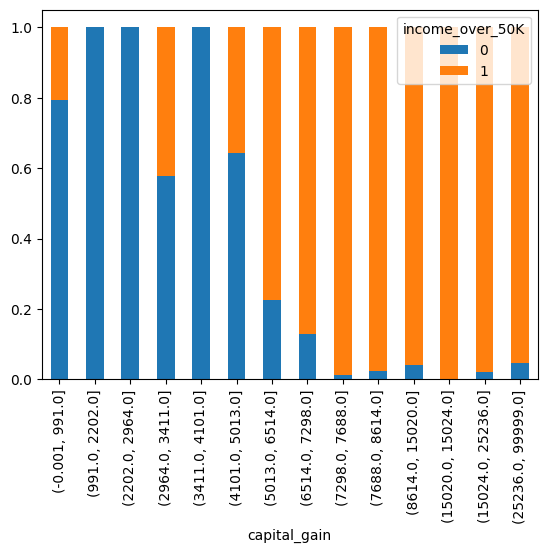

In [1375]:
# capital_gain_data = df_1[['capital_gain' , 'income_over_50K']]
cut_capital_gain = pd.qcut(df_1['capital_gain'], q=160, duplicates='drop')

crosstab = pd.crosstab(cut_capital_gain, df_1['income_over_50K'], margins=False)

churn_crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
churn_crosstab_norm
churn_crosstab_norm.plot(kind = 'bar', stacked = True)


<Axes: xlabel='demogweight'>

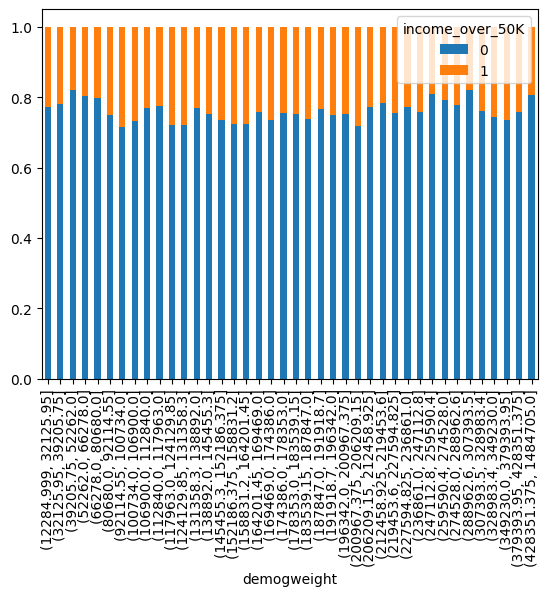

In [1376]:
# capital_gain_data = df_1[['capital_gain' , 'income_over_50K']]
cut_capital_gain = pd.qcut(df_1['demogweight'], q=40, duplicates='drop')

crosstab = pd.crosstab(cut_capital_gain, df_1['income_over_50K'], margins=False)

crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
crosstab_norm
crosstab_norm.plot(kind = 'bar', stacked = True)

# Fine tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Input, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import tensorflow as tf


In [ ]:
# Enable DirectML GPU accelaration
import os
# Set environment variables
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ["TENSORFLOW_USE_DIRECTML"] = "1"

physical_devices = tf.config.list_physical_devices()
print("Available devices:", physical_devices)

# Explicitly enable GPU
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass
for device in physical_devices:
    print(f"\nDevice: {device.name}")
    print(f"Type: {device.device_type}")

Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Device: /physical_device:CPU:0
Type: CPU


In [ ]:
# Create a neural network with specified architecture and optimizer
def create_model(n_layers, neurons_per_layer, activation, optimizer_name, learning_rate, dropout_rates):
    
    model = Sequential()
    
    # Convert neurons_per_layer string to list of integers
    neurons_list = [int(x) for x in neurons_per_layer.split(',')]
    
    # Convert dropout_rates string to list of floats
    dropout_list = [float(x) for x in dropout_rates.split(',')]
    
    # Ensure we have enough neuron counts and dropout rates for requested layers
    if len(neurons_list) < n_layers:
        raise ValueError(f"Not enough neuron counts provided for {n_layers} layers")
    if len(dropout_list) < n_layers:
        raise ValueError(f"Not enough dropout rates provided for {n_layers} layers")
    
    # Input layer
    model.add(Input(shape=(X_train_array.shape[1],)))
    
    # Hidden layers
    for i in range(n_layers):
        model.add(Dense(neurons_list[i], activation=activation))
        if dropout_list[i] > 0:  # Only add dropout if rate is greater than 0
            model.add(Dropout(dropout_list[i]))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Configure optimizer
    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    elif optimizer_name == 'adagrad':
        optimizer = Adagrad(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

In [ ]:
# Create early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
# Create KerasClassifier
model = KerasClassifier(
    model=create_model,
    verbose=0
)

In [ ]:
# Define parameter grid
param_grid = {
    'batch_size': [88],
    'epochs': [54],
    'model__n_layers': [3],
    'model__neurons_per_layer': ['30,31,32'],
    'model__activation': ['relu'],
    'model__optimizer_name': ['adam'],
    'model__learning_rate': [0.001],
    'model__dropout_rates': ['0.2,0.1,0.1']
}

In [ ]:
# Perform grid search with cross-validation
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy', 
    cv=10,
    n_jobs=-1,
    verbose=2
)

In [ ]:
# Fit grid search
grid_result = grid.fit(
    X_train_array, 
    y_train_array,
    callbacks=[early_stopping],
    validation_data=(X_valid_array, y_valid_array)
)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [ ]:
# Print results
print("\nBest: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: 0.851543 using {'batch_size': 88, 'epochs': 54, 'model__activation': 'relu', 'model__dropout_rates': '0.2,0.1,0.1', 'model__learning_rate': 0.001, 'model__n_layers': 3, 'model__neurons_per_layer': '30,31,32', 'model__optimizer_name': 'adam'}


# Optimal Model Training

In [ ]:
# Separate target and features before scaling
target = df_1a['income_over_50K']
features = df_1a.drop('income_over_50K', axis=1)


In [ ]:
print("\nFeature shape before scaling:", features.shape)


Feature shape before scaling: (25000, 96)


In [ ]:
feature_names = features.columns
np.save('feature_names.npy', feature_names)


In [ ]:
# Scale the features
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(features)
df_scaled_features = pd.DataFrame(scaled_features, columns=features.columns)


In [ ]:
# Our optimal model
def create_model(optimizer='adam'):
    model = Sequential()
    
    # First hidden layer
    model.add(Dense(31, input_shape=(features.shape[1],), activation='relu'))
    model.add(Dropout(0.2))
    
    # Second hidden layer
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    
    # Output layer
    model.add(Dense(1, activation='sigmoid'))
    
    # Configure optimizer
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=0.001)
    
    # Compile model
    model.compile(loss='binary_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])
    
    return model

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Convert to numpy arrays and ensure correct dtype
X = df_scaled_features.values.astype('float32')
y = target.values.astype('float32').reshape(-1, 1)


In [ ]:
print("\nTraining data shapes:")
print("X shape:", X.shape)
print("y shape:", y.shape)



Training data shapes:
X shape: (25000, 96)
y shape: (25000, 1)


In [ ]:
# Create and compile model
model = create_model(optimizer='adam')

c:\Users\hbdil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train model
history = model.fit(
    X, y,
    epochs=54,
    batch_size=88,
    callbacks=[early_stopping],
    verbose=1,
)

Epoch 1/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7777 - loss: 0.4854
Epoch 2/54
 91/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8296 - loss: 0.3660

c:\Users\hbdil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8312 - loss: 0.3638
Epoch 3/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.3504
Epoch 4/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8389 - loss: 0.3434
Epoch 5/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8423 - loss: 0.3376
Epoch 6/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: 0.3319
Epoch 7/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.8459 - loss: 0.3300
Epoch 8/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8498 - loss: 0.3257
Epoch 9/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.3210
Epoch 10/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8527 - loss: 0.3202
Epoch 11/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8520 - loss: 0.3176
Epoch 12/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8543 - loss: 0.3147
Epoch 13/54
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - acc

In [ ]:
# Save the model
model.save('census_optimal_model.keras')

In [ ]:
# Print final metrics
final_loss, final_accuracy = model.evaluate(X, y, verbose=0)
print(f"\nFinal training metrics:")
print(f"Loss: {final_loss:.4f}")
print(f"Accuracy: {final_accuracy:.4f}")


Final training metrics:
Loss: 0.2759
Accuracy: 0.8752


# Prediction

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Load and preprocess test data
df_test = pd.read_csv('USCensusTest.csv')
df_test.columns = [colname.replace('-', '_') for colname in df_test.columns]
df_test = df_test.replace('?', None)

# Using mode for imputation
workclass_mode = df_test['workclass'].mode()[0]
occupation_mode = df_test['occupation'].mode()[0]
native_country_mode = df_test['native_country'].mode()[0]

# Imputation
df_test['workclass'].fillna(workclass_mode, inplace=True)
df_test['occupation'].fillna(occupation_mode, inplace=True)
df_test['native_country'].fillna(native_country_mode, inplace=True)

##NEWLY ADDED
df_testa = df_test.drop(columns = ['education_num'], inplace= True)

# Create dummy variables
df_testa = pd.get_dummies(df_test, drop_first=True)
df_testa = df_testa.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

#Add missing column
df_testa['native_country_Holand_Netherlands'] = 0

# name the cols in the same fashion as above
df_testa.columns = [colname.replace("-", "_") for colname in df_testa.columns]

#order columns in the same orientation as training above
df_temp1  = df_testa[df_predictors.columns]


C:\Users\hbdil\AppData\Local\Temp\ipykernel_24556\4197069413.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test['workclass'].fillna(workclass_mode, inplace=True)
C:\Users\hbdil\AppData\Local\Temp\ipykernel_24556\4197069413.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [ ]:
print("\nFeature shape before scaling:", df_testa.shape)



Feature shape before scaling: (7561, 96)


In [ ]:
feature_names = np.load('feature_names.npy', allow_pickle=True)

In [ ]:
# Scale the features
scaler = preprocessing.MinMaxScaler()
scaled_features = scaler.fit_transform(df_testa)
df_scaled_features = pd.DataFrame(scaled_features, columns=df_testa.columns)

In [ ]:
scaled_features.shape

(7561, 96)

In [ ]:
# Convert to numpy arrays and ensure correct dtype
X_test = df_scaled_features.values.astype('float32')


In [ ]:
print("\nTesting data shapes:")
print("X_test shape:", X_test.shape)


Testing data shapes:
X_test shape: (7561, 96)


In [ ]:
# Load the saved model
model = load_model('census_optimal_model.keras')

In [ ]:
# Get predictions
predictions = model.predict(X_test)

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step


In [ ]:
# Convert to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)


In [ ]:
# Write predictions to txt file
predictions_df = pd.DataFrame(binary_predictions, columns=['predictions'])
predictions_df.to_csv('Team8predictions.txt', index=False, header=False)

In [ ]:
predictions_df.predictions.value_counts()

predictions
0    7082
1     479
Name: count, dtype: int64

In [ ]:
predictions_df.predictions.value_counts(normalize=True)

predictions
0    0.936649
1    0.063351
Name: proportion, dtype: float64

In [ ]:
# Read the data and count occurrences
zeros = 0
ones = 0

with open('Team8predictions.txt', 'r') as file:
    for line in file:
        value = int(line.strip())  # Convert string to integer
        if value == 0:
            zeros += 1
        elif value == 1:
            ones += 1

# Print results
print(f"Number of 0s: {zeros}")
print(f"Number of 1s: {ones}")
print(f"Total values: {zeros + ones}")
print(f"Percentage of 0s: {(zeros/(zeros+ones))*100:.1f}%")
print(f"Percentage of 1s: {(ones/(zeros+ones))*100:.1f}%")

Number of 0s: 7082
Number of 1s: 479
Total values: 7561
Percentage of 0s: 93.7%
Percentage of 1s: 6.3%


# CART Tree for Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
y = df_1a['income_over_50K']
X = df_1a.drop('income_over_50K', axis=1)

In [ ]:
# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X, y)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Get feature importances and create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
})

In [ ]:
# Sort by importance and format for display
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df['Importance'] = feature_importance_df['Importance'].apply(lambda x: f"{x:.4%}")


In [ ]:
# Print results with nice formatting
print("\nFeature Importance Rankings:")
print("-" * 60)
print(feature_importance_df.head(20).to_string(index=False))
print("\nSummary Statistics:")
print("-" * 60)
print(f"Total number of features: {len(X.columns)}")
print(f"Features with importance > 1%: {sum(dt.feature_importances_ > 0.01)}")
print(f"Cumulative importance of top 10 features: {dt.feature_importances_[dt.feature_importances_.argsort()[-10:]].sum():.2%}")


Feature Importance Rankings:
------------------------------------------------------------
                          Feature Importance
marital_status_Married_civ_spouse   39.9436%
                     capital_gain   22.4421%
                     capital_loss    9.1932%
                              age    5.8332%
              education_Bachelors    4.9096%
                education_Masters    3.9824%
                   hours_per_week    3.8197%
       occupation_Exec_managerial    1.8907%
            education_Prof_school    1.6970%
              education_Doctorate    1.5228%
                      demogweight    1.3891%
       workclass_Self_emp_not_inc    0.6910%
                relationship_Wife    0.6110%
                education_HS_grad    0.3625%
         occupation_Other_service    0.2528%
             native_country_India    0.1705%
              workclass_Local_gov    0.1461%
     native_country_United_States    0.1335%
                         sex_Male    0.0900%
      occ